In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.668464,#VALUE!,#VALUE!,0.567248,0.506609,0.655030,0.636979,0.536181,0.506654,0.518761,0.496152,0.459147,0.449182,0.353947,0.357103,0.329711,0.304403,4
1,1997-02-28 00:00:00,0.624202,#VALUE!,#VALUE!,0.680081,0.668988,0.563555,0.562441,0.449556,0.436823,0.418170,0.399000,0.432388,0.428415,0.347527,0.347865,0.350774,0.343032,4
2,1997-03-31 00:00:00,0.636686,#VALUE!,#VALUE!,0.502622,0.568925,0.479497,0.450737,0.450872,0.413733,0.399141,0.374429,0.405359,0.388403,0.373381,0.367970,0.286711,0.279589,4
3,1997-04-30 00:00:00,0.671868,#VALUE!,#VALUE!,0.427443,0.382158,0.399787,0.374874,0.405612,0.390073,0.368219,0.351346,0.356374,0.340721,0.337753,0.348024,0.255888,0.283248,4
4,1997-05-31 00:00:00,0.653710,#VALUE!,#VALUE!,0.551612,0.482485,0.356650,0.347836,0.343839,0.322845,0.385693,0.368022,0.375736,0.351954,0.371183,0.374078,0.293054,0.312884,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               240 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.6448574264000001


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.748759,0.463996,0.459970,0.462691,0.445034,0.481965,0.458896,0.484205,0.467530,0.472029,0.452825,0.490704,0.483611,3.020833
std,0.084027,0.301411,0.308222,0.324705,0.319725,0.311822,0.306211,0.298950,0.298897,0.271653,0.270178,0.204445,0.202668,0.956269
min,0.650305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.110442,1.000000
25%,0.673854,0.258909,0.266958,0.193521,0.242873,0.282129,0.331780,0.320932,0.347141,0.365638,0.356942,0.388140,0.354422,2.000000
50%,0.726344,0.442967,0.432338,0.482088,0.409862,0.501721,0.466142,0.488848,0.448403,0.435960,0.397427,0.472557,0.448932,3.000000
75%,0.808058,0.660763,0.648886,0.654981,0.621312,0.641719,0.580827,0.683124,0.587331,0.600868,0.519146,0.524562,0.477998,4.000000
max,0.968081,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 3-mo (Treasury)  48.0  0.463996  0.301411  0.043505   
 2                         combined  96.0  0.606378  0.262536  0.026795   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.376476  0.551517  
 2   0.553183  0.659572  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2848
 1                              Degrees of freedom =   94.0000
 2                                               t =    6.3051
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2870
 7                                       Hedge's g =    1.2767
 8                        

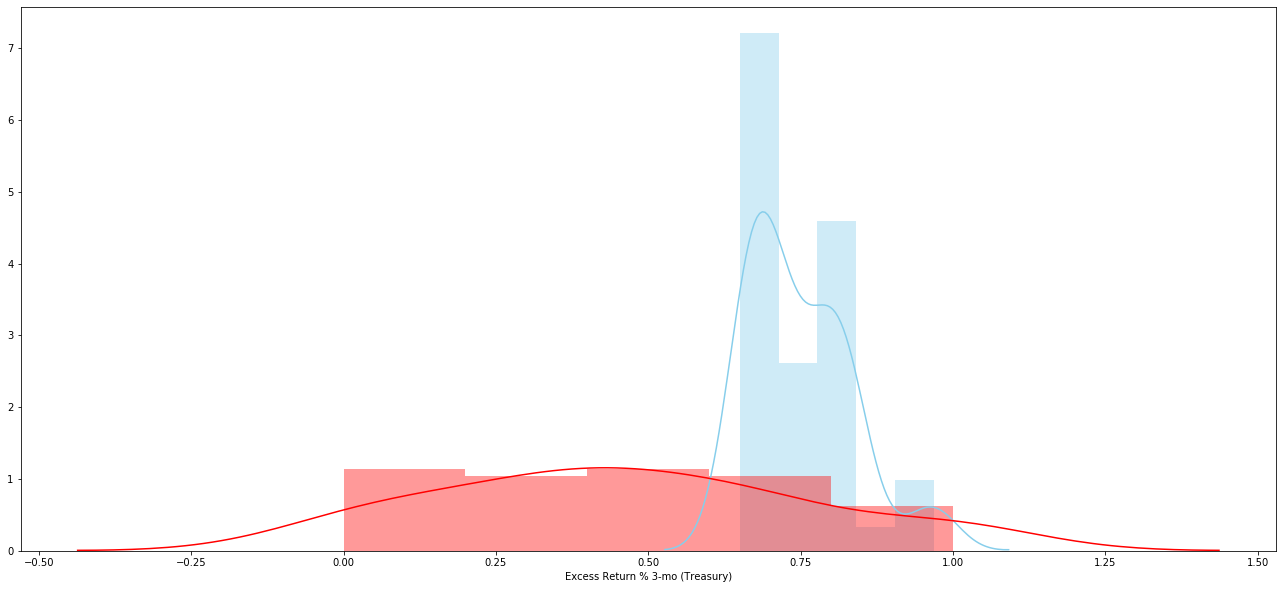

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 3-mo (Agg)  48.0  0.459970  0.308222  0.044488   0.370472   
 2                    combined  96.0  0.604364  0.267512  0.027303   0.550161   
 
    Interval  
 0  0.773158  
 1  0.549469  
 2  0.658567  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2888
 1                             Degrees of freedom =   94.0000
 2                                              t =    6.2628
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2784
 7                                      Hedge's g =    1.2682
 8                                  Glass's delta =    

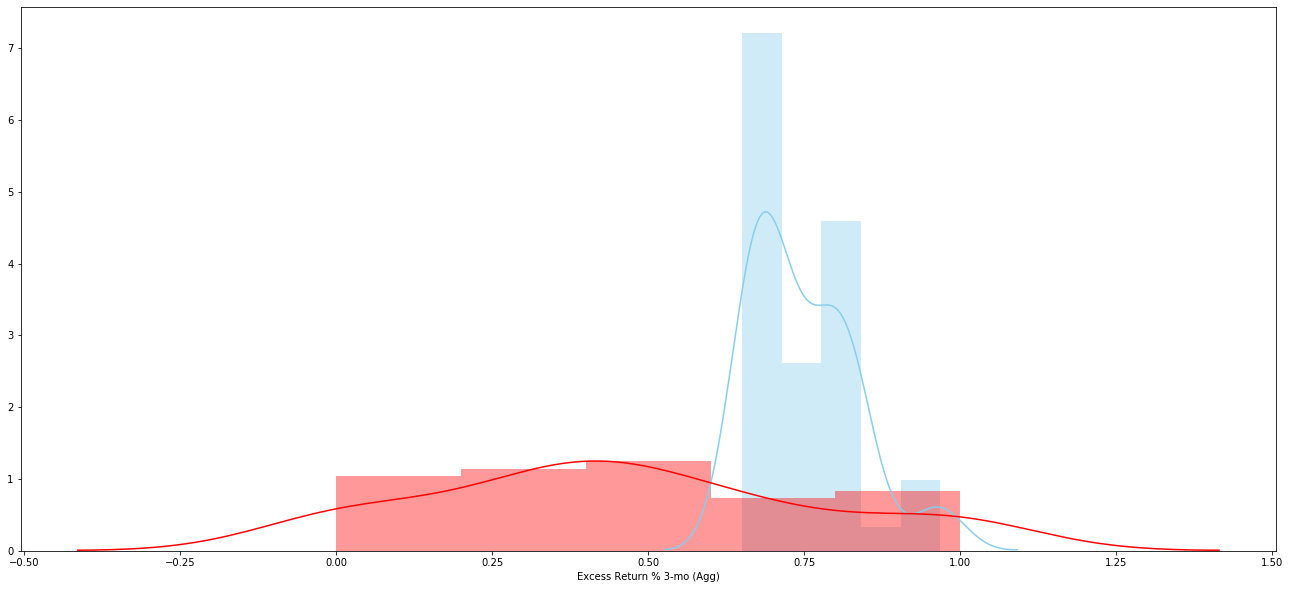

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 6-mo (Treasury)  48.0  0.462691  0.324705  0.046867   
 2                         combined  96.0  0.605725  0.276277  0.028197   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.368406  0.556975  
 2   0.549746  0.661704  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2861
 1                              Degrees of freedom =   94.0000
 2                                               t =    5.9092
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2062
 7                                       Hedge's g =    1.1966
 8                        

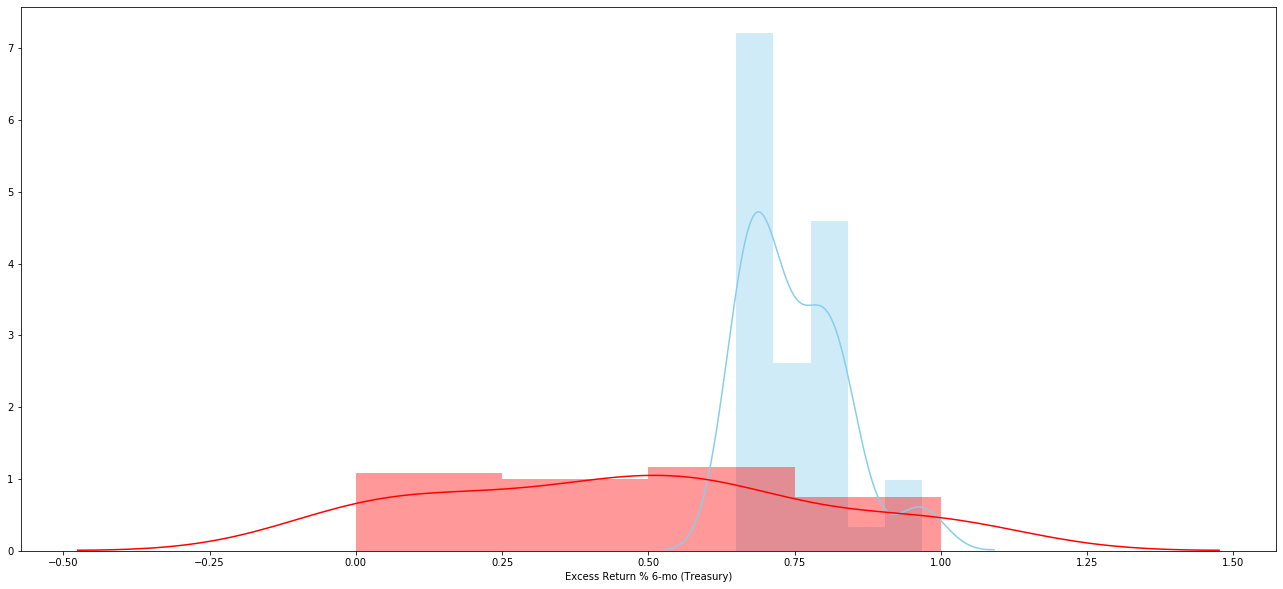

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 6-mo (Agg)  48.0  0.445034  0.319725  0.046148   0.352196   
 2                    combined  96.0  0.596896  0.278159  0.028389   0.540536   
 
    Interval  
 0  0.773158  
 1  0.537873  
 2  0.653257  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.3037
 1                             Degrees of freedom =   94.0000
 2                                              t =    6.3653
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2993
 7                                      Hedge's g =    1.2889
 8                                  Glass's delta =    

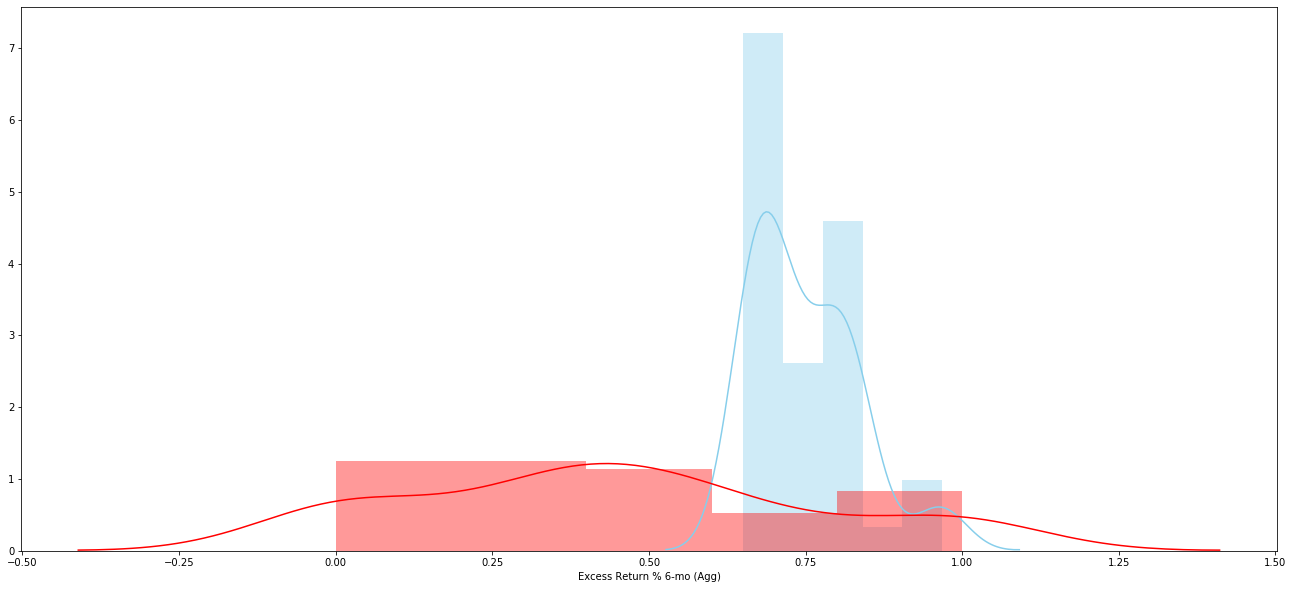

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 9-mo (Treasury)  48.0  0.481965  0.311822  0.045008   
 2                         combined  96.0  0.615362  0.263780  0.026922   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.391421  0.572509  
 2   0.561915  0.668809  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2668
 1                              Degrees of freedom =   94.0000
 2                                               t =    5.7236
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1683
 7                                       Hedge's g =    1.1590
 8                        

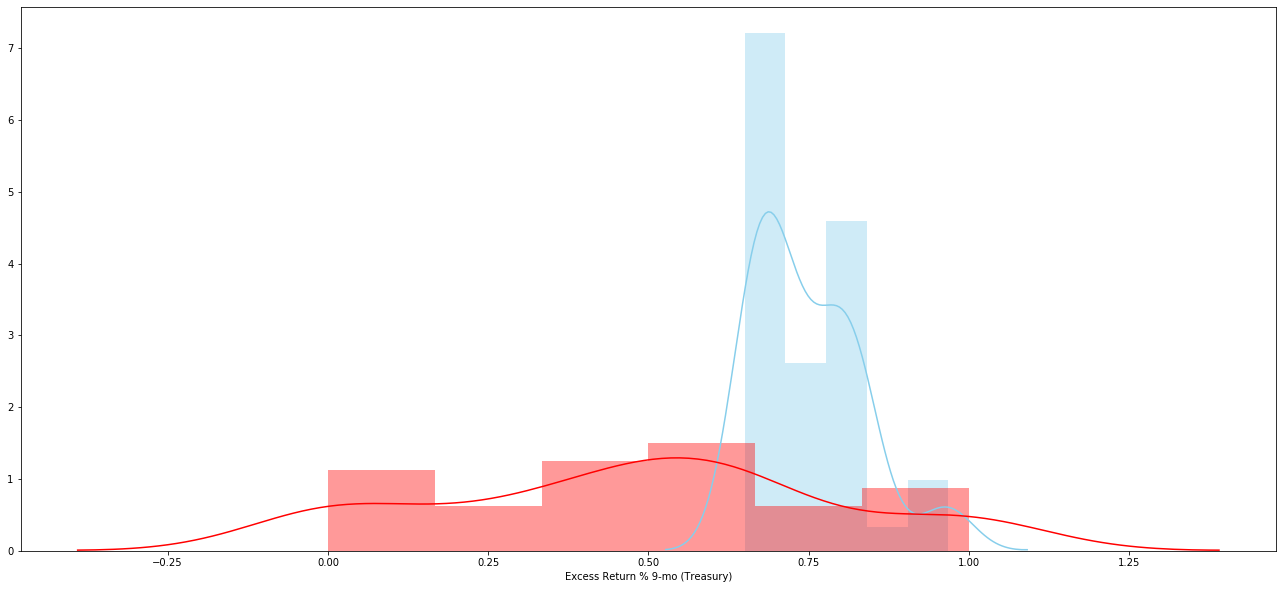

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 9-mo (Agg)  48.0  0.458896  0.306211  0.044198   0.369982   
 2                    combined  96.0  0.603827  0.266661  0.027216   0.549797   
 
    Interval  
 0  0.773158  
 1  0.547811  
 2  0.657858  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2899
 1                             Degrees of freedom =   94.0000
 2                                              t =    6.3245
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2910
 7                                      Hedge's g =    1.2807
 8                                  Glass's delta =    

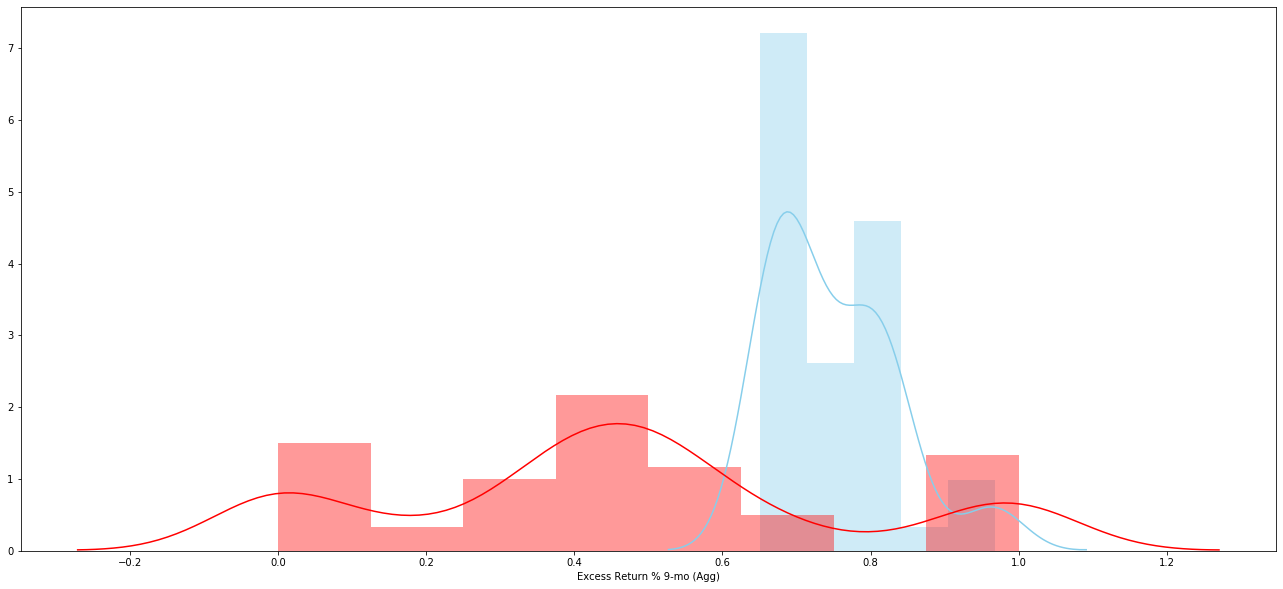

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 12-mo (Treasury)  48.0  0.484205  0.298950  0.043150   
 2                          combined  96.0  0.616482  0.255714  0.026099   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.397399  0.571011  
 2   0.564669  0.668294  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2646
 1                              Degrees of freedom =   94.0000
 2                                               t =    5.9023
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2048
 7                                       Hedge's g =    1.1952
 8                    

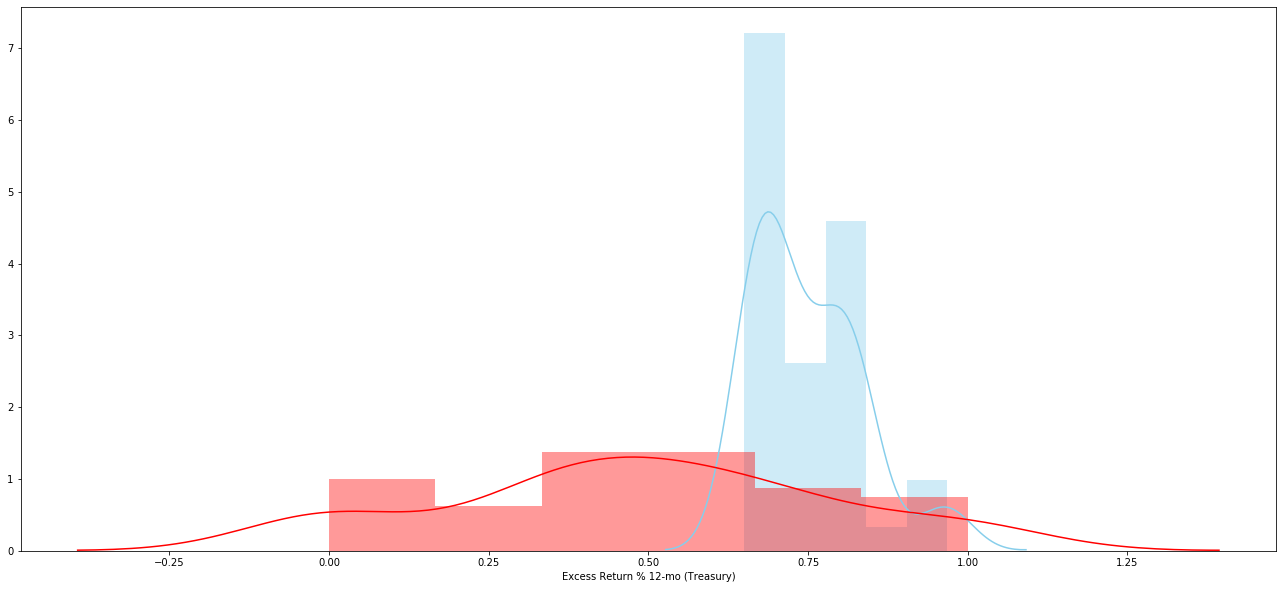

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 12-mo (Agg)  48.0  0.467530  0.298897  0.043142   0.380739   
 2                     combined  96.0  0.608144  0.260141  0.026550   0.555435   
 
    Interval  
 0  0.773158  
 1  0.554320  
 2  0.660854  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.2812
 1                              Degrees of freedom =   94.0000
 2                                               t =    6.2754
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2810
 7                                       Hedge's g =    1.2707
 8                                   Glass

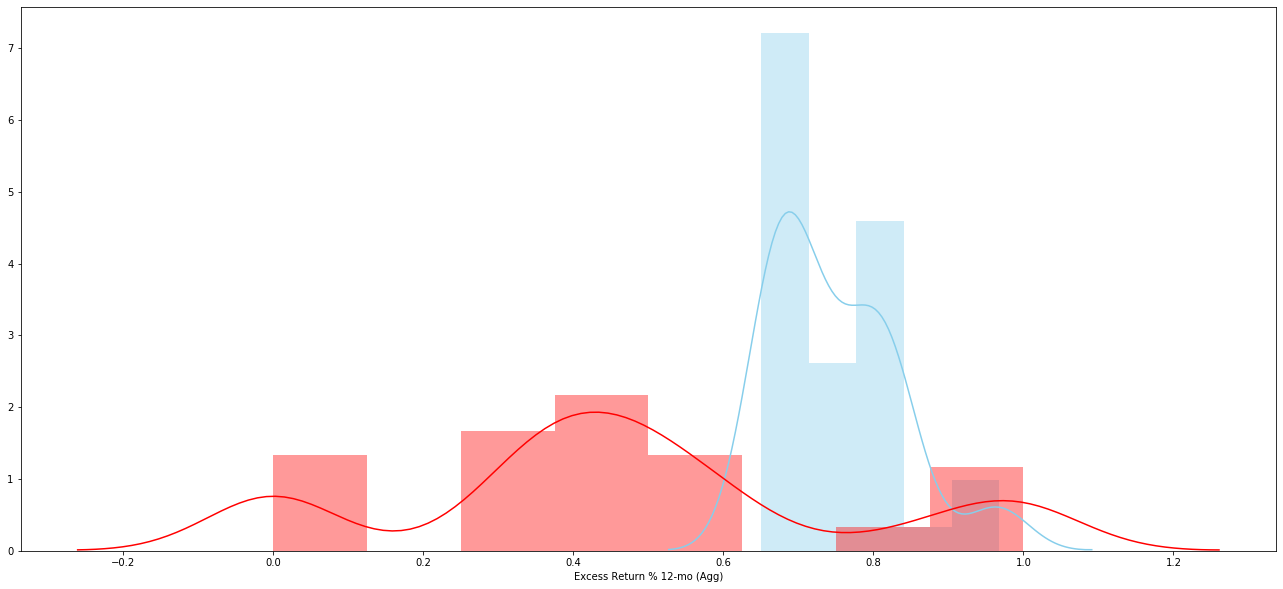

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 24-mo (Treasury)  48.0  0.472029  0.271653  0.039210   
 2                          combined  96.0  0.610394  0.243616  0.024864   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.393149  0.550909  
 2   0.561033  0.659755  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2767
 1                              Degrees of freedom =   94.0000
 2                                               t =    6.7425
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3763
 7                                       Hedge's g =    1.3653
 8                    

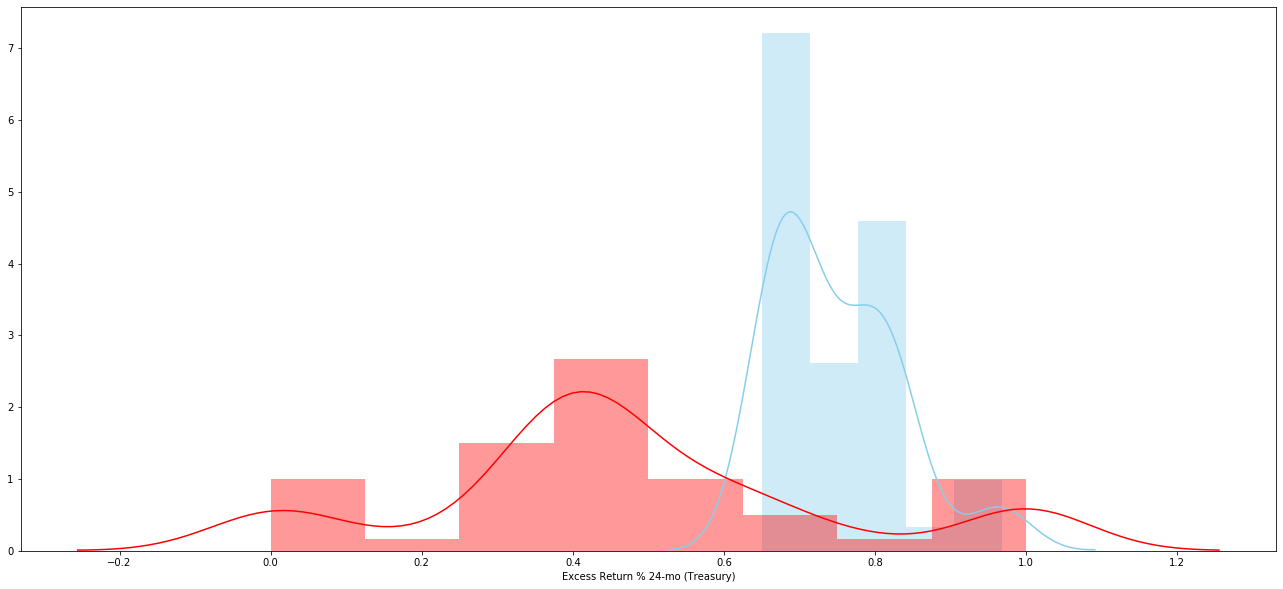

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 24-mo (Agg)  48.0  0.452825  0.270178  0.038997   0.374374   
 2                     combined  96.0  0.600792  0.248459  0.025358   0.550450   
 
    Interval  
 0  0.773158  
 1  0.531277  
 2  0.651134  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.2959
 1                              Degrees of freedom =   94.0000
 2                                               t =    7.2463
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.4791
 7                                       Hedge's g =    1.4673
 8                                   Glass

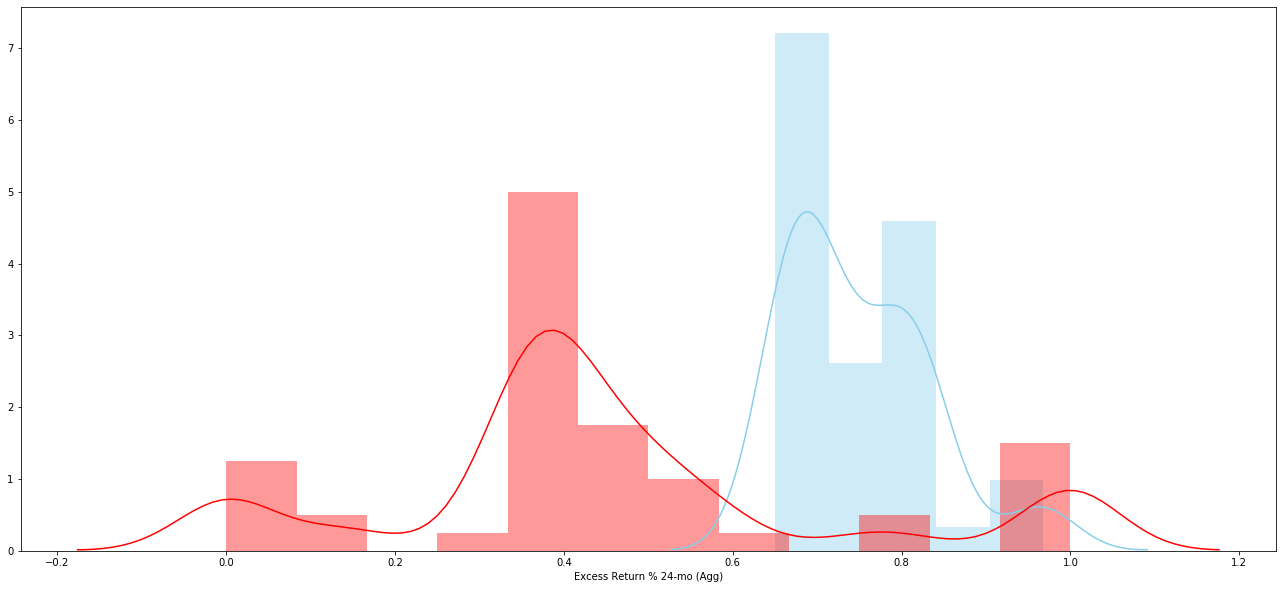

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 36-mo (Treasury)  48.0  0.490704  0.204445  0.029509   
 2                          combined  96.0  0.619732  0.202473  0.020665   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.431340  0.550069  
 2   0.578707  0.660756  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.2581
 1                              Degrees of freedom =   94.0000
 2                                               t =    8.0884
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6510
 7                                       Hedge's g =    1.6378
 8                    

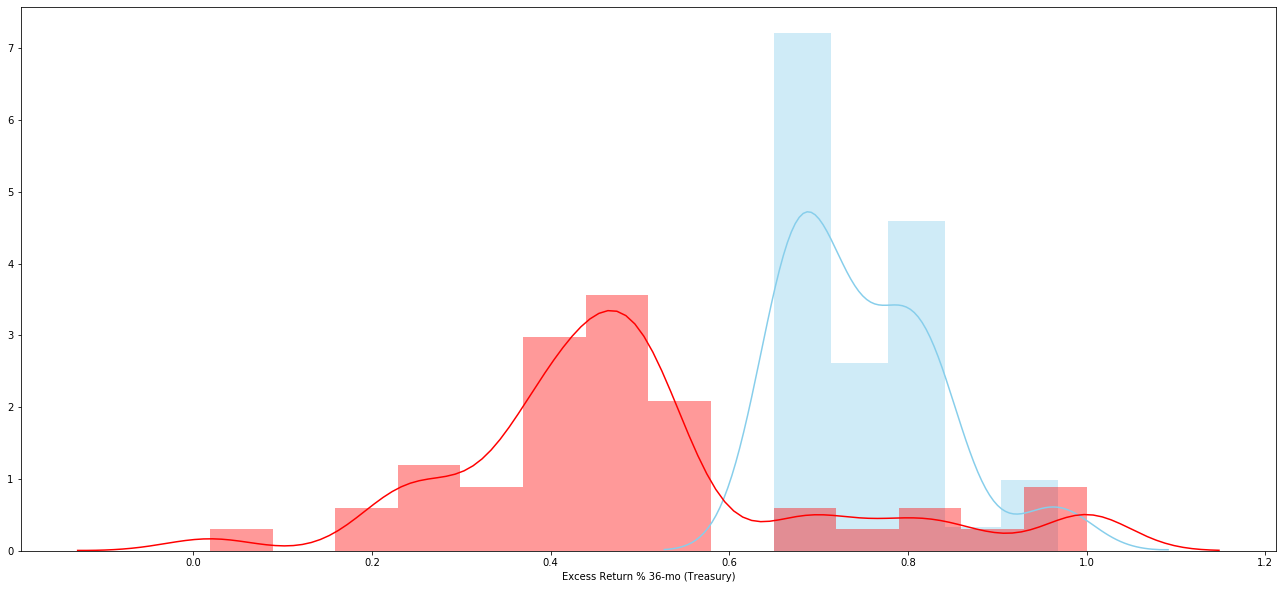

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 36-mo (Agg)  48.0  0.483611  0.202668  0.029253   0.424762   
 2                     combined  96.0  0.616185  0.203899  0.020810   0.574871   
 
    Interval  
 0  0.773158  
 1  0.542459  
 2  0.657499  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.2651
 1                              Degrees of freedom =   94.0000
 2                                               t =    8.3730
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7091
 7                                       Hedge's g =    1.6954
 8                                   Glass

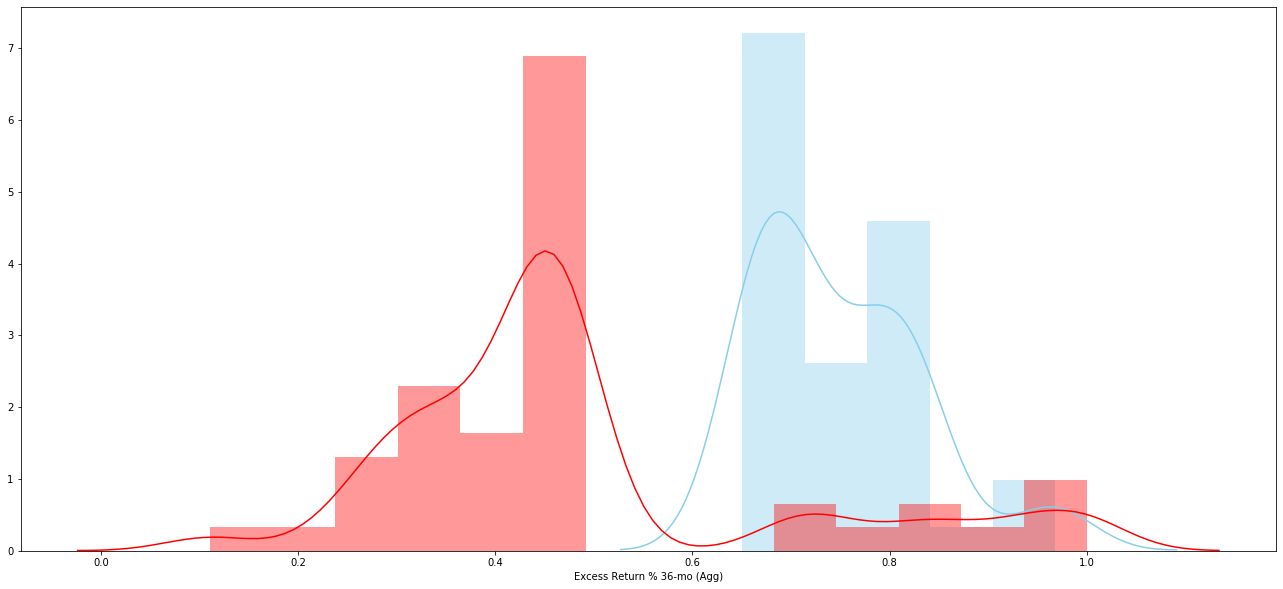

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.497619,0.498871,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.223015,0.227708,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.374153,0.374529,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.507964,0.511728,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.623599,0.623407,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 3-mo (Treasury)  278.0  0.486959  0.233621  0.014012   
 2                         combined  326.0  0.525506  0.237004  0.013126   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.459376  0.514541  
 2   0.499682  0.551329  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2618
 1                              Degrees of freedom =   324.0000
 2                                               t =     7.6703
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1989
 7                                       Hedge's g =     1.1961
 8           

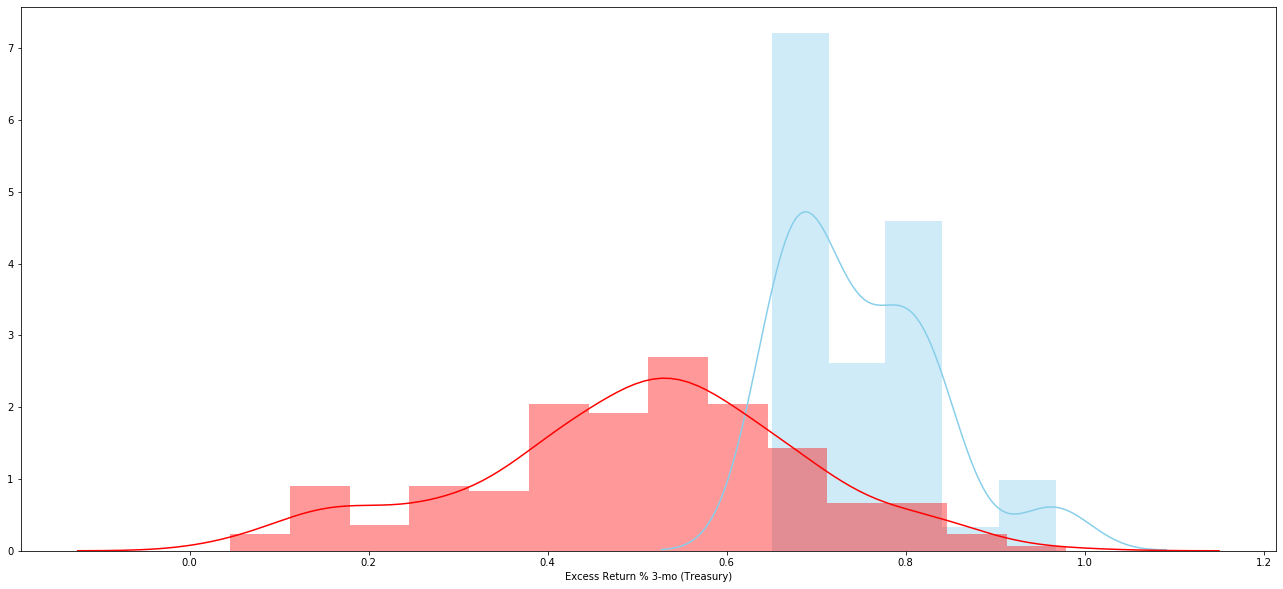

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 3-mo (Agg)  278.0  0.491705  0.234617  0.014071   0.464004   
 2                    combined  326.0  0.529553  0.237189  0.013137   0.503710   
 
    Interval  
 0  0.773158  
 1  0.519405  
 2  0.555397  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2571
 1                             Degrees of freedom =   324.0000
 2                                              t =     7.4999
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1723
 7                                      Hedge's g =     1.1695
 8                                  Glass'

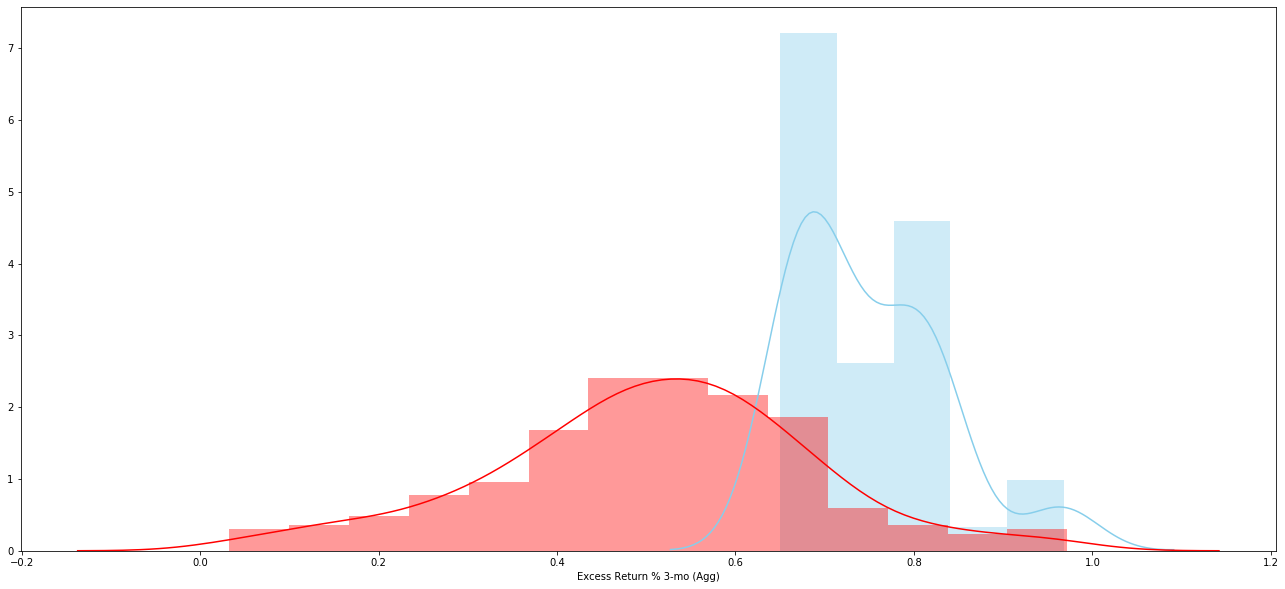

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 6-mo (Treasury)  275.0  0.485184  0.232990  0.014050   
 2                         combined  323.0  0.524353  0.236727  0.013172   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.457525  0.512843  
 2   0.498439  0.550267  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2636
 1                              Degrees of freedom =   321.0000
 2                                               t =     7.7417
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2110
 7                                       Hedge's g =     1.2082
 8           

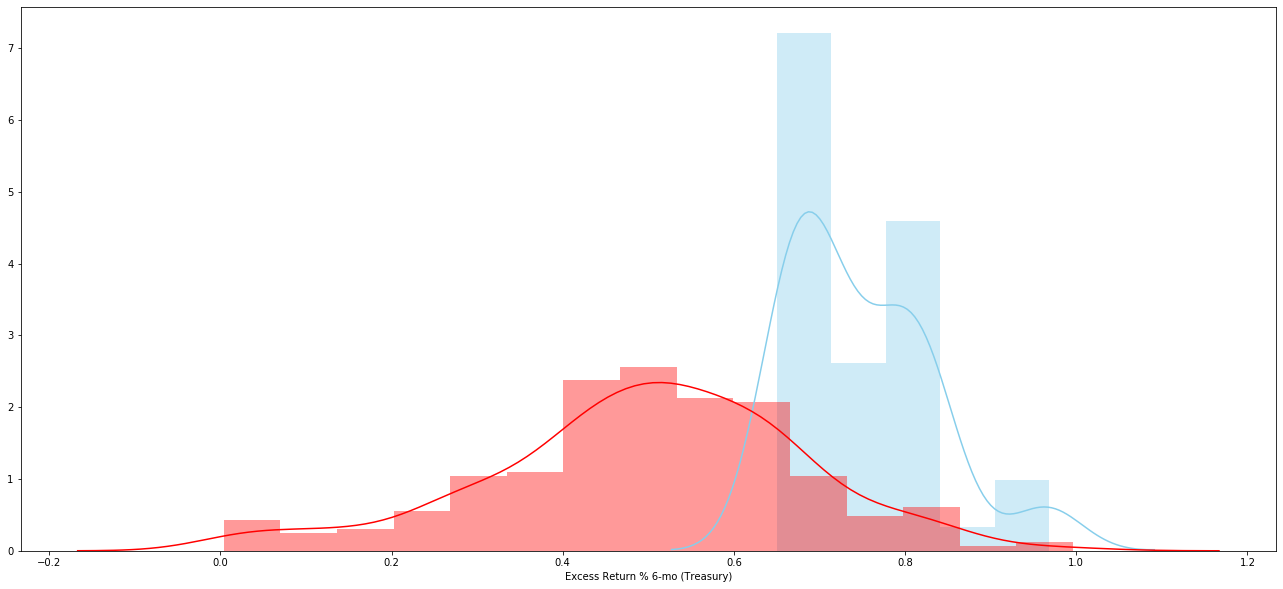

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 6-mo (Agg)  275.0  0.488772  0.235452  0.014198   0.460820   
 2                    combined  323.0  0.527408  0.238292  0.013259   0.501322   
 
    Interval  
 0  0.773158  
 1  0.516723  
 2  0.553493  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2600
 1                             Degrees of freedom =   321.0000
 2                                              t =     7.5582
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1823
 7                                      Hedge's g =     1.1795
 8                                  Glass'

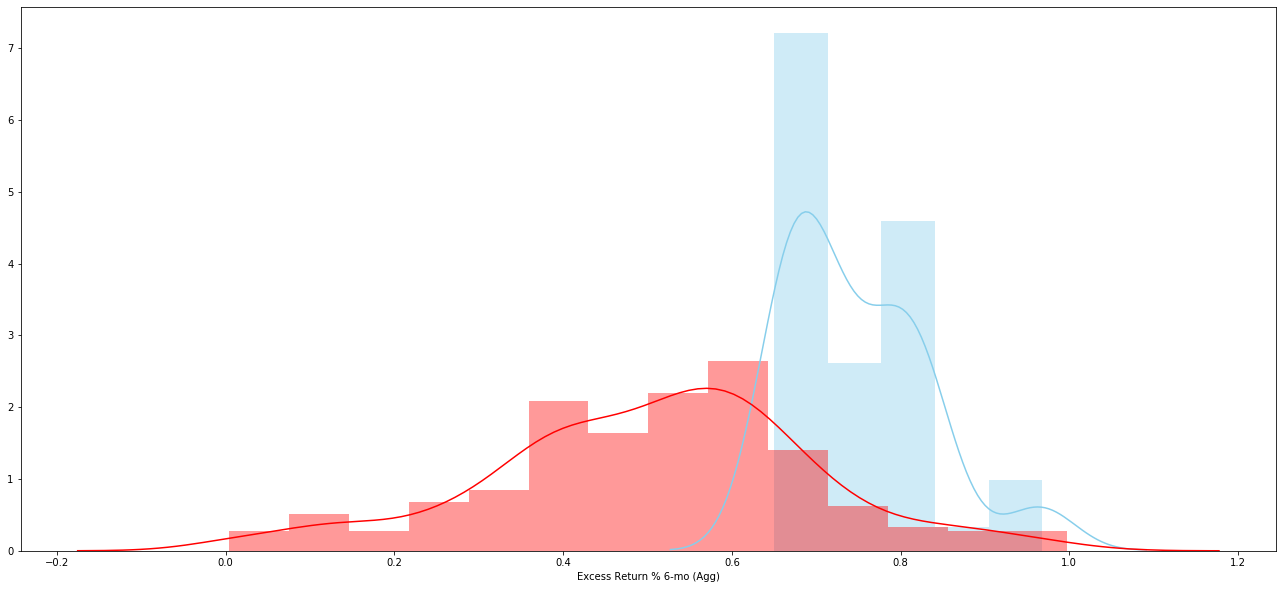

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 9-mo (Treasury)  272.0  0.494764  0.231428  0.014032   
 2                         combined  320.0  0.532863  0.234075  0.013085   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.467138  0.522390  
 2   0.507119  0.558608  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2540
 1                              Degrees of freedom =   318.0000
 2                                               t =     7.5086
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1755
 7                                       Hedge's g =     1.1727
 8           

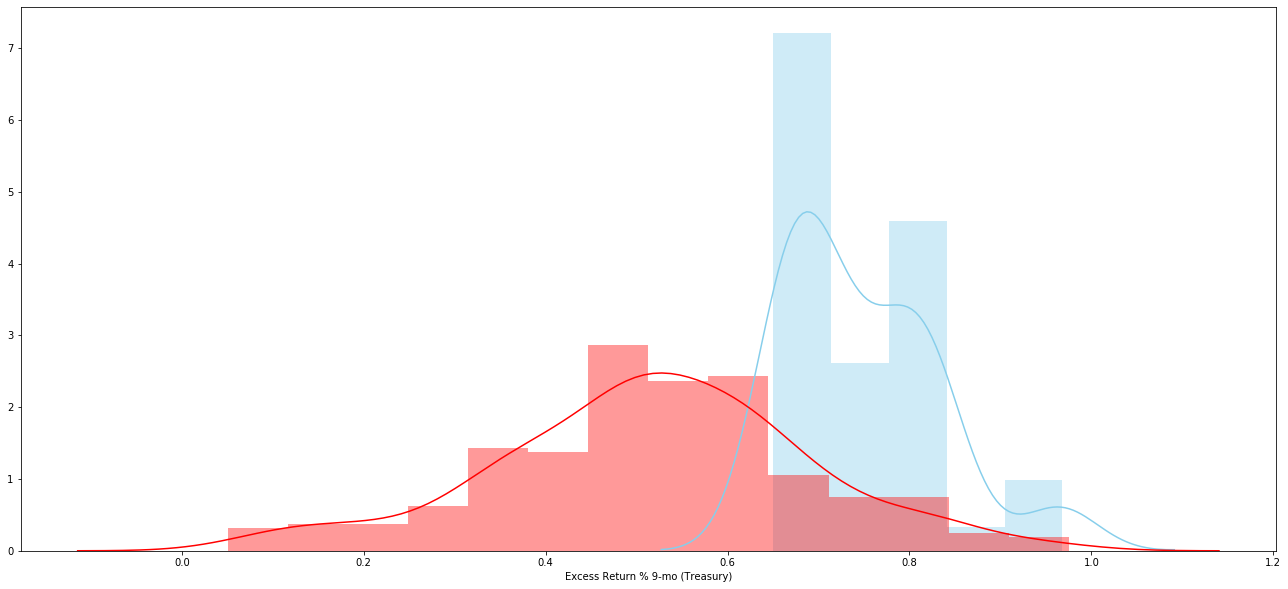

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   48.0  0.748759  0.084027  0.012128   0.724360   
 1  Excess Return % 9-mo (Agg)  272.0  0.495848  0.236072  0.014314   0.467668   
 2                    combined  320.0  0.533785  0.237835  0.013295   0.507627   
 
    Interval  
 0  0.773158  
 1  0.524029  
 2  0.559943  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2529
 1                             Degrees of freedom =   318.0000
 2                                              t =     7.3327
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1480
 7                                      Hedge's g =     1.1453
 8                                  Glass'

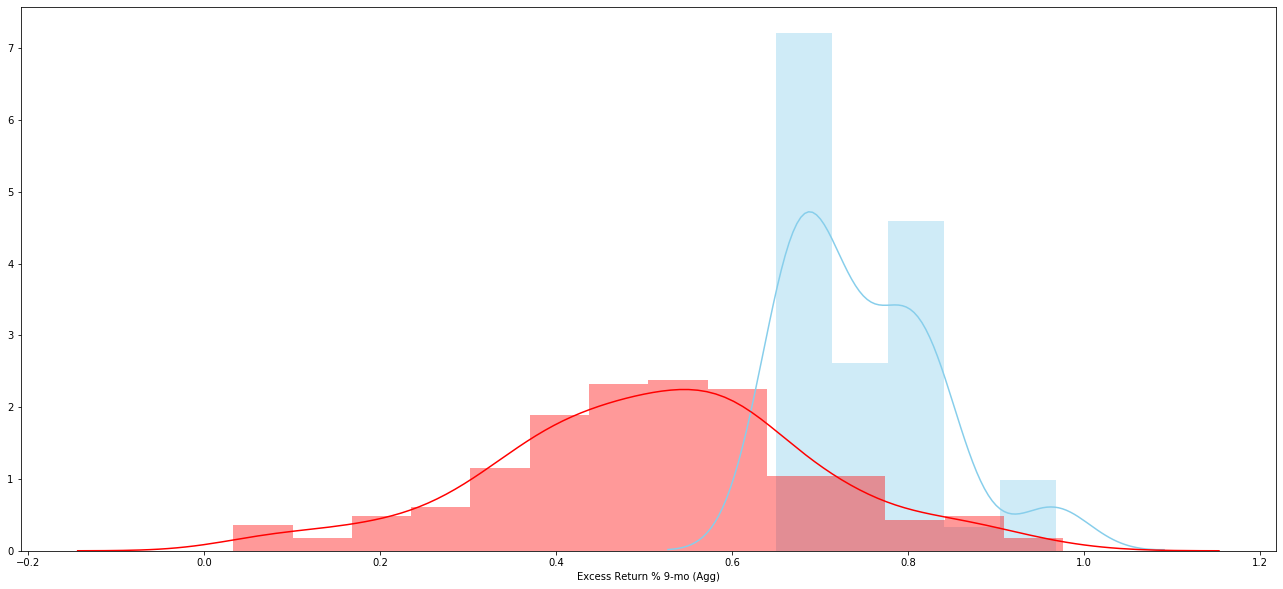

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 12-mo (Treasury)  269.0  0.487819  0.225139  0.013727   
 2                          combined  317.0  0.527331  0.229815  0.012908   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.460793  0.514846  
 2   0.501935  0.552726  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2609
 1                              Degrees of freedom =   315.0000
 2                                               t =     7.9233
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2415
 7                                       Hedge's g =     1.2385
 8       

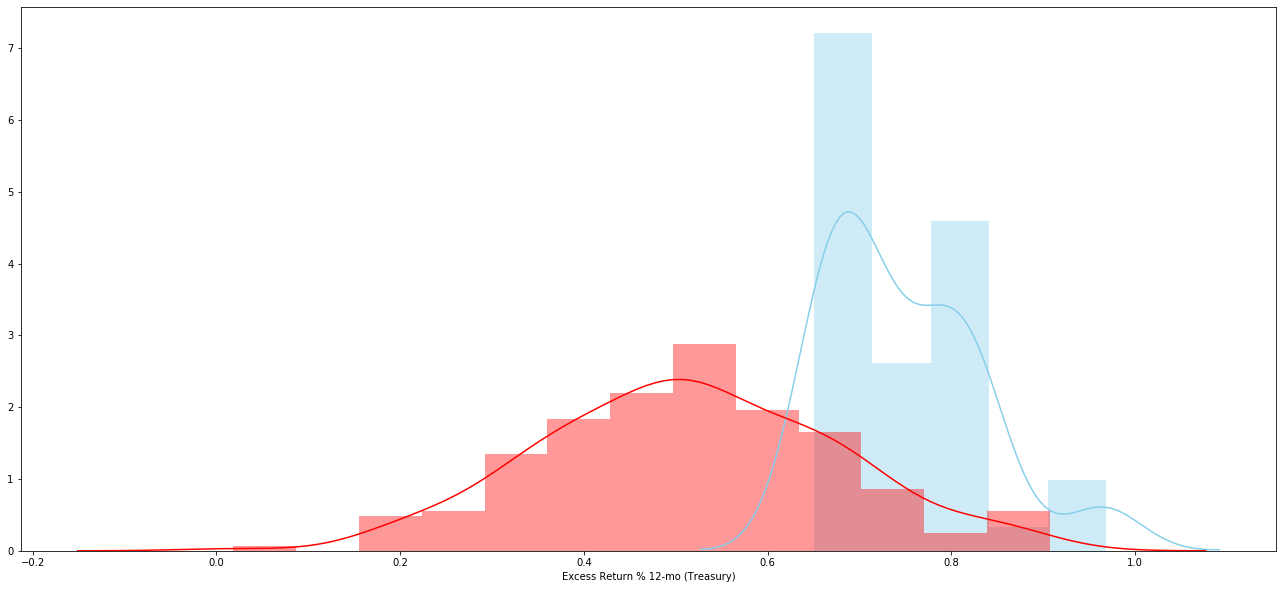

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 12-mo (Agg)  269.0  0.497761  0.229379  0.013985   
 2                     combined  317.0  0.535767  0.231934  0.013027   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.470226  0.525297  
 2   0.510137  0.561397  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2510
 1                              Degrees of freedom =   315.0000
 2                                               t =     7.4837
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1726
 7                                       Hedge's g =     1.1698
 8                           

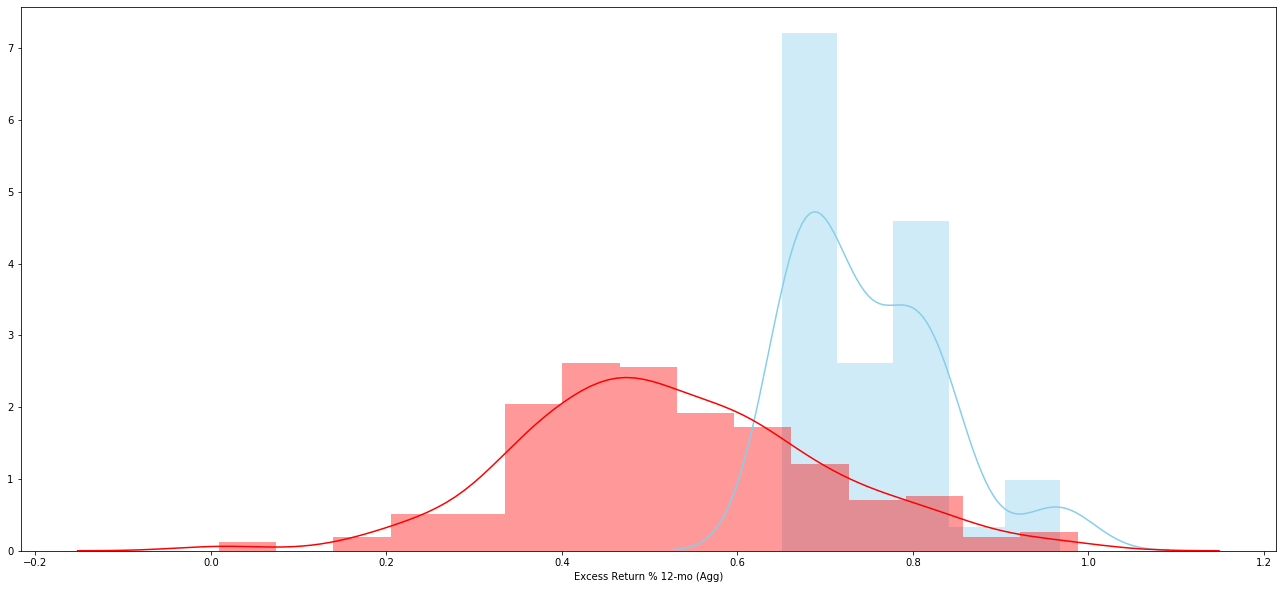

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 24-mo (Treasury)  257.0  0.473469  0.231109  0.014416   
 2                          combined  305.0  0.516793  0.236965  0.013569   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.445080  0.501859  
 2   0.490093  0.543494  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2753
 1                              Degrees of freedom =   303.0000
 2                                               t =     8.1434
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2805
 7                                       Hedge's g =     1.2773
 8       

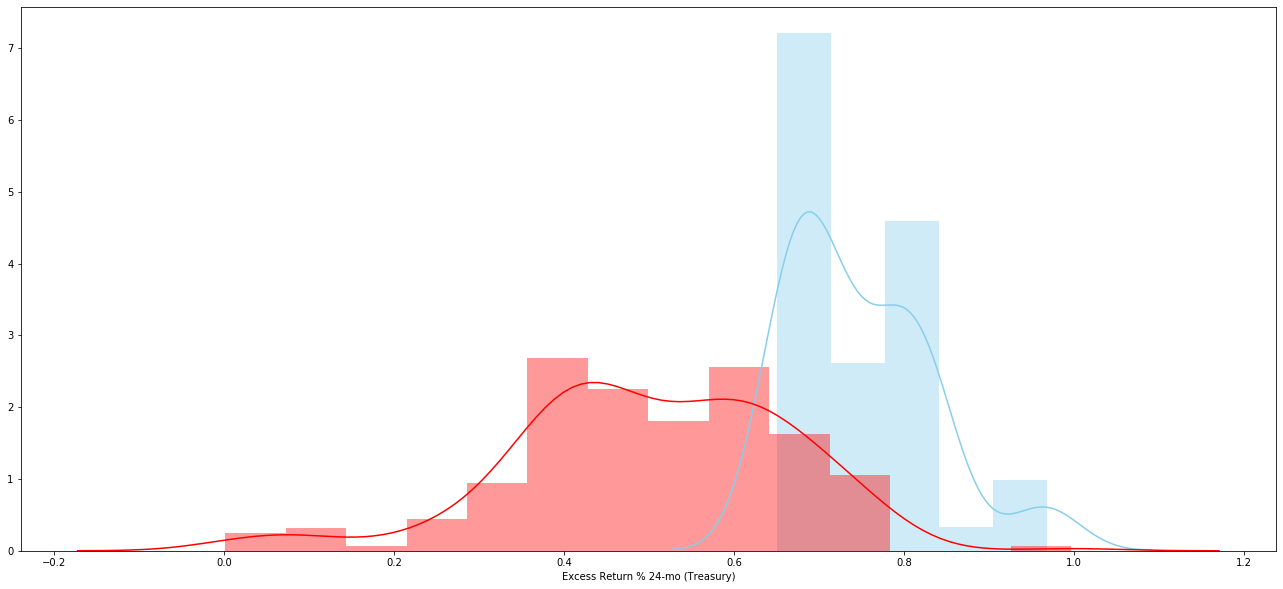

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 24-mo (Agg)  257.0  0.482113  0.227496  0.014191   
 2                     combined  305.0  0.524077  0.232667  0.013322   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.454167  0.510059  
 2   0.497861  0.550293  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2666
 1                              Degrees of freedom =   303.0000
 2                                               t =     8.0099
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2595
 7                                       Hedge's g =     1.2564
 8                           

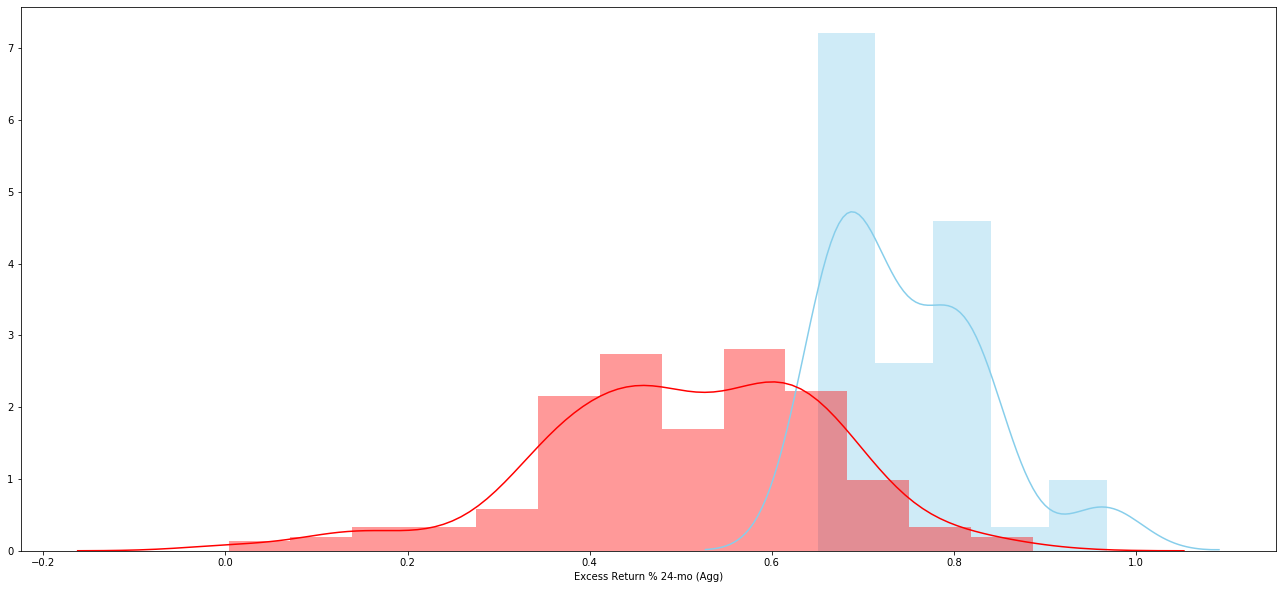

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 36-mo (Treasury)  245.0  0.462641  0.227934  0.014562   
 2                          combined  293.0  0.509513  0.236225  0.013800   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.433957  0.491324  
 2   0.482352  0.536674  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2861
 1                              Degrees of freedom =   291.0000
 2                                               t =     8.5733
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3532
 7                                       Hedge's g =     1.3498
 8       

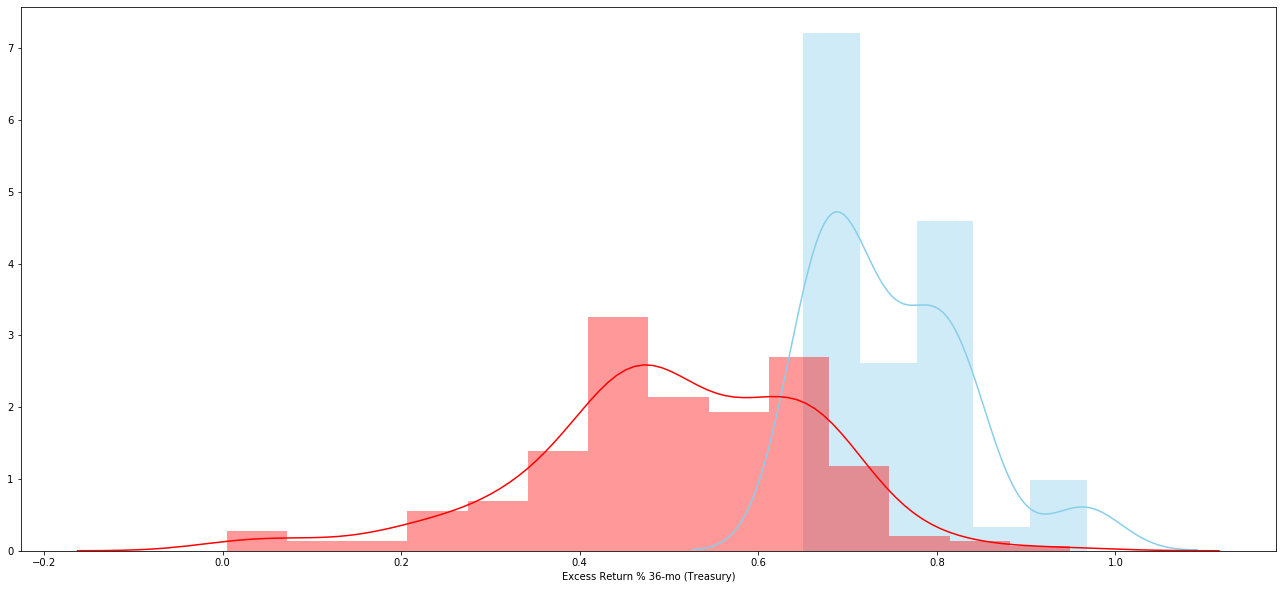

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   48.0  0.748759  0.084027  0.012128   
 1  Excess Return % 36-mo (Agg)  245.0  0.461482  0.220252  0.014071   
 2                     combined  293.0  0.508544  0.230253  0.013452   
 
    95% Conf.  Interval  
 0   0.724360  0.773158  
 1   0.433765  0.489199  
 2   0.482070  0.535018  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2873
 1                              Degrees of freedom =   291.0000
 2                                               t =     8.9002
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4048
 7                                       Hedge's g =     1.4012
 8                           

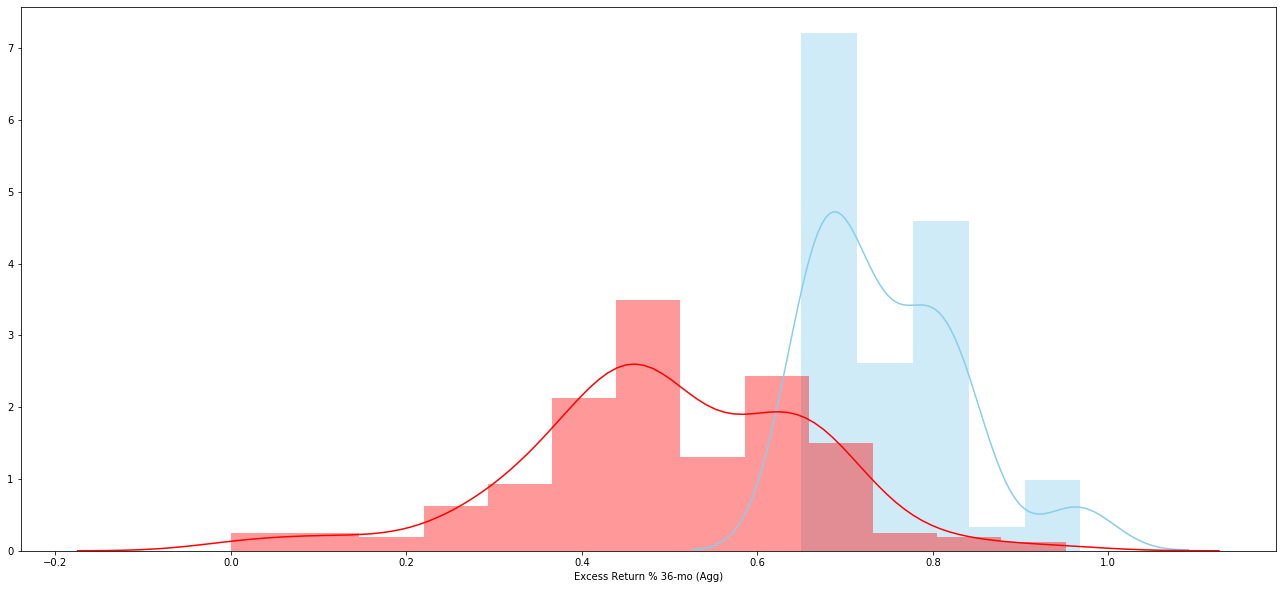

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")